In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

В работе используется датасет: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Он содержит информацию о состоянии, возрасте, положении пациентов, а также о факте инсульта.

Аттрибуты
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

In [287]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
print(df.head(3).to_string())

      id  gender   age  hypertension  heart_disease ever_married      work_type Residence_type  avg_glucose_level   bmi   smoking_status  stroke
0   9046    Male  67.0             0              1          Yes        Private          Urban             228.69  36.6  formerly smoked       1
1  51676  Female  61.0             0              0          Yes  Self-employed          Rural             202.21   NaN     never smoked       1
2  31112    Male  80.0             0              1          Yes        Private          Rural             105.92  32.5     never smoked       1


Выведем уникальные значения в столбцах

In [288]:
for column in df:
    print(column)
    print(df[column].unique())

id
[ 9046 51676 31112 ... 19723 37544 44679]
gender
['Male' 'Female' 'Other']
age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e

Проведем предобработку данных.
Удалим невалидные строки, а также строки со значениями, что нас не интересуют

In [289]:
for col in df:
    df = df.dropna(subset=[col])

df = df.drop(columns=['id'])
df = df.drop(df[df['gender'] == 'Other'].index)
df = df.drop(df[df['smoking_status'] == 'Unknown'].index) 

Построим графики распределения значений для категоричных аттрибутов.

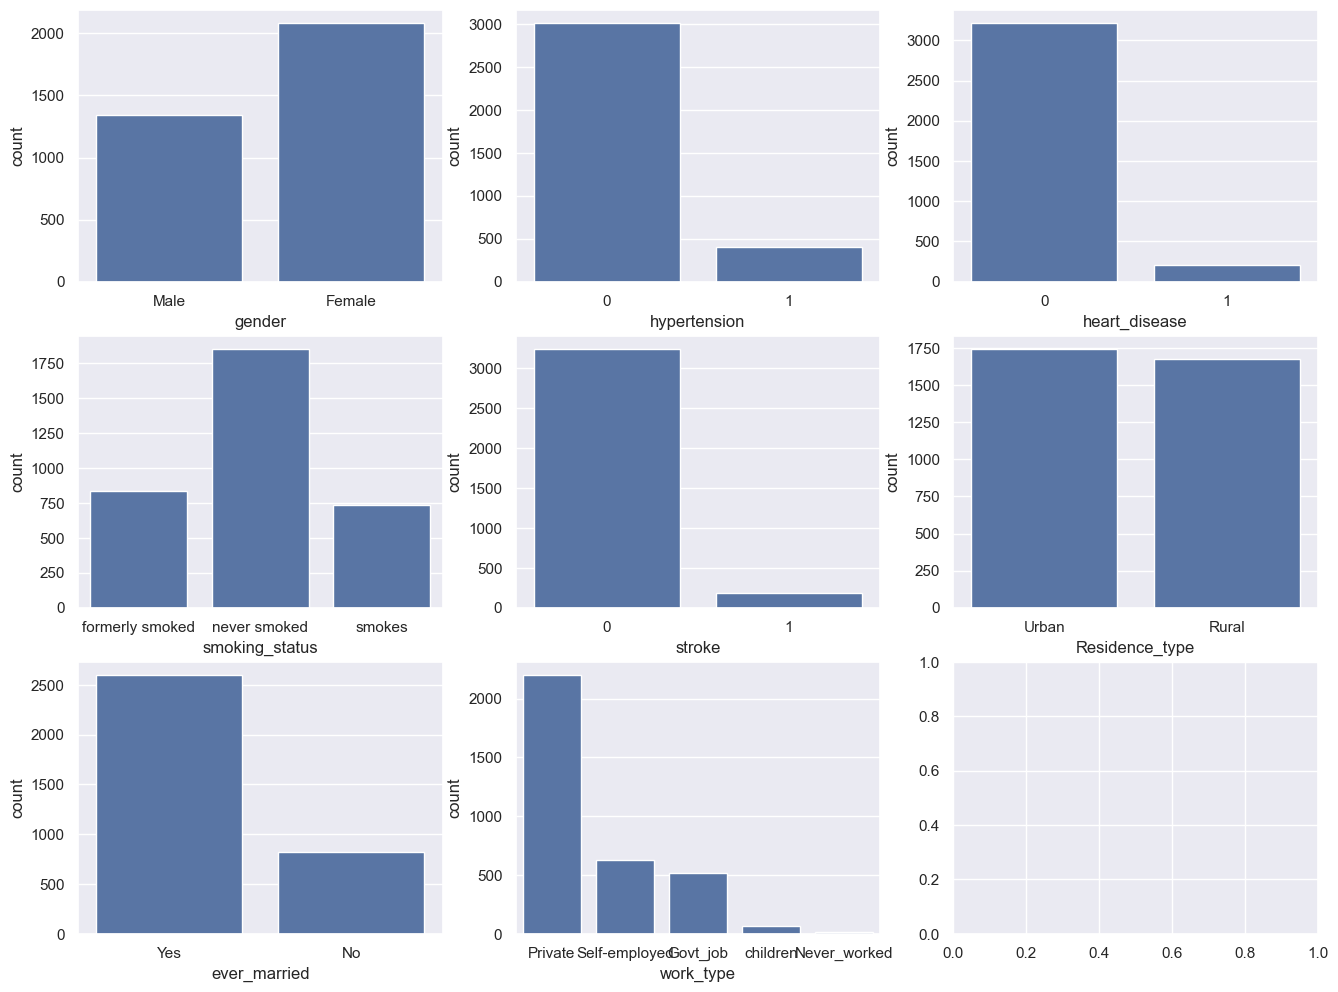

In [290]:
fig,axes = plt.subplots(3,3,figsize = (16,12))
sns.countplot(ax=axes[0,0], data=df, x='gender')
sns.countplot(ax=axes[0,1], data=df, x='hypertension')
sns.countplot(ax=axes[0,2], data=df, x='heart_disease')
sns.countplot(ax=axes[1,0], data=df, x='smoking_status')
sns.countplot(ax=axes[1,1], data=df, x='stroke')
sns.countplot(ax=axes[1,2], data=df, x='Residence_type')
sns.countplot(ax=axes[2,0], data=df, x='ever_married')
sns.countplot(ax=axes[2,1], data=df, x='work_type')
sns.set(style='darkgrid')
plt.show()

Построим гистограмму распределения значений по возрасту, определим присутствуют ли выбросы.
По блочной диаграмме видно, что выбросы отсутствуют.

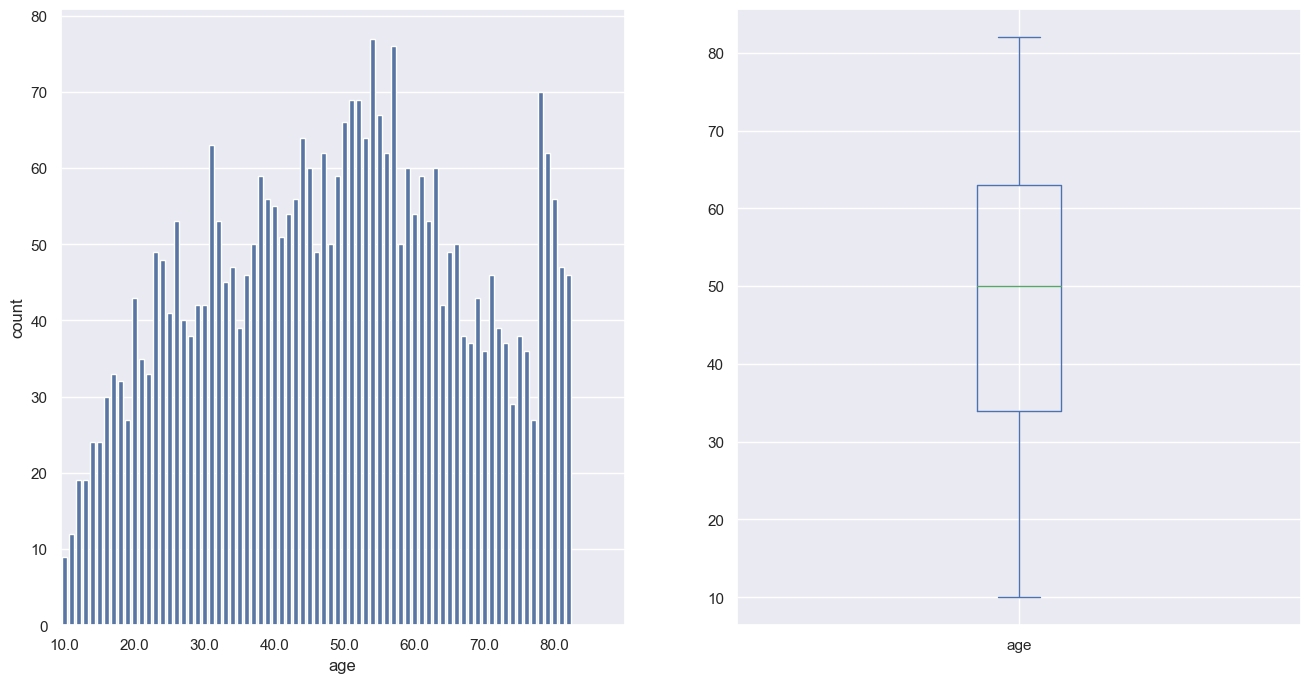

In [291]:
fig,axes = plt.subplots(1,2, figsize = (16, 8))

g = sns.countplot(ax=axes[0], data=df, x='age')
g.set_xticks(range(0, 85, 10))
_, bp = df['age'].plot.box(ax=axes[1], return_type='both')

plt.show()

Построим гистограмму распределения значений по уровню глюкозы, определим присутствуют ли выбросы.
По блочной диаграмме видно, что данный столбец содержит большое количество выбросов.

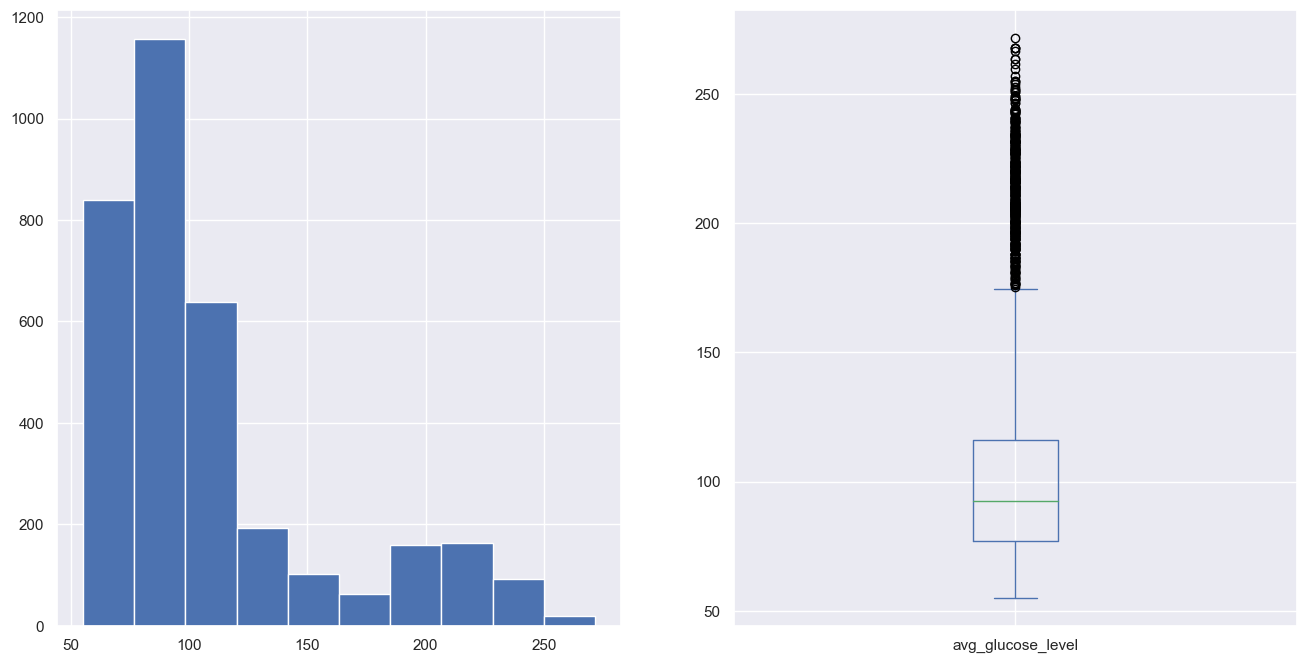

In [292]:
fig,axes = plt.subplots(1,2, figsize = (16, 8))

axes[0].hist(df['avg_glucose_level'], bins=10)
_, bp = df['avg_glucose_level'].plot.box(ax=axes[1], return_type='both')

plt.show()

Построим гистограмму распределения значений по уровню индексу BMI (body mass index), определим присутствуют ли выбросы.
По блочной диаграмме видно, что данный столбец также содержит большое количество выбросов.

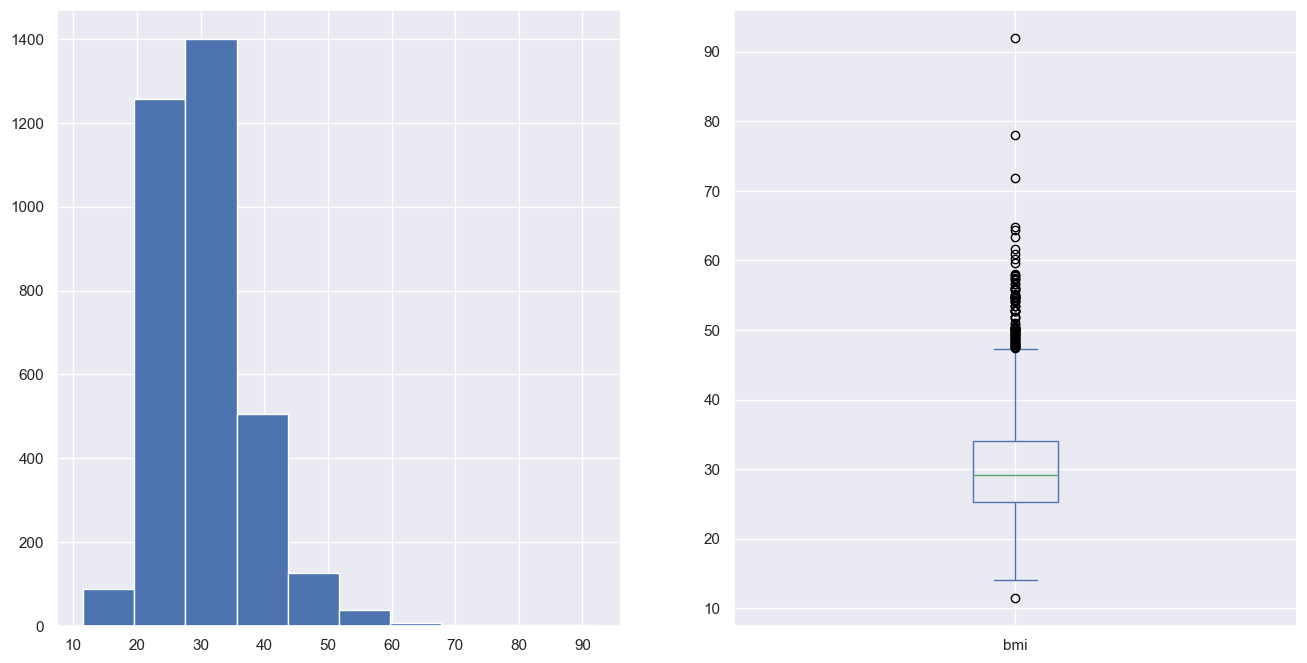

In [293]:
fig,axes = plt.subplots(1,2, figsize = (16, 8))

axes[0].hist(df['bmi'], bins=10)
_, bp = df['bmi'].plot.box(ax=axes[1], return_type='both')

plt.show()


Построим матрицу корреляции на интересующих нас столбцах.
Если уровень корреляции приблизительно равен 0, то можно говорить об отсутствии связи между параметрами
Уровень корреляции больший 0 говорит о прямом влиянии одного атрибута, на второй
Уровень корреляции меньше 0 говорит об обратном влиянии
Уровень корреляции равный 1 встречается на главной диагонали

Т.о. из матрицы ниже видно, что хоть сколько-то весомое влияние на показатели оказывает только возраст пациента.
Также не меньший вклад оказывают показатели гипертонии, наличия сердечных болезней и уровни глюкозы.

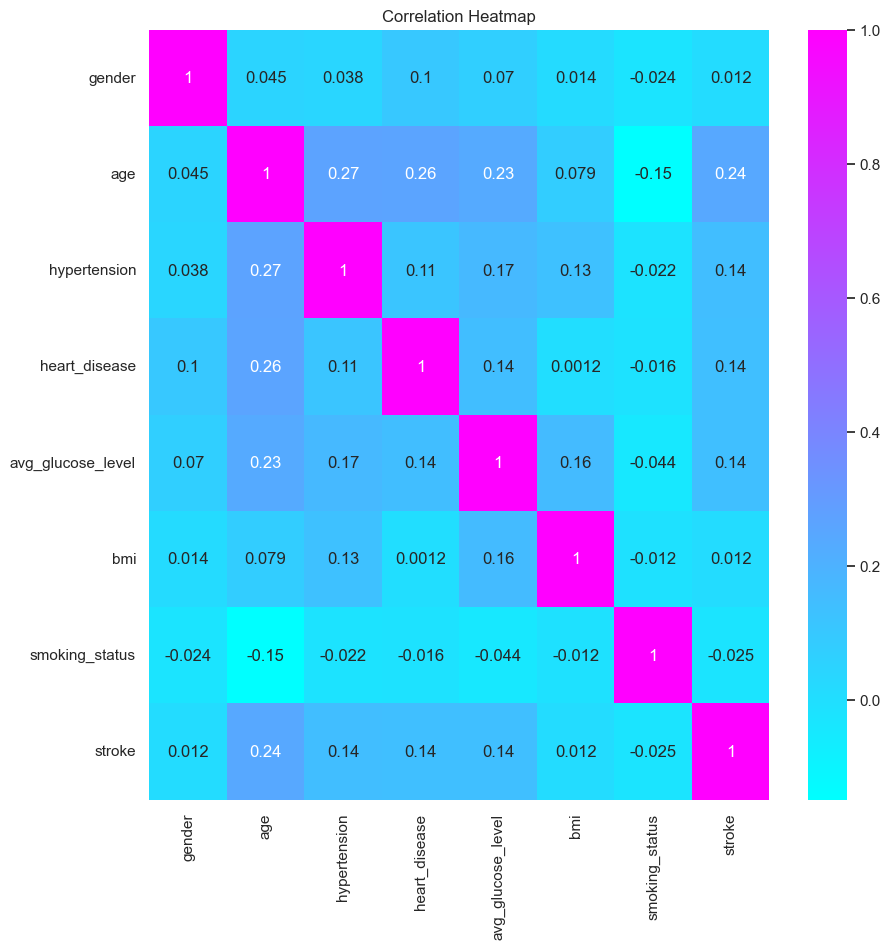

In [294]:
df['gender']=df['gender'].astype('category').cat.codes
df['ever_married']=df['ever_married'].astype('category').cat.codes
df['work_type']=df['work_type'].astype('category').cat.codes
df['Residence_type']=df['Residence_type'].astype('category').cat.codes
df['smoking_status']=df['smoking_status'].astype('category').cat.codes
df['stroke']=df['stroke'].astype('category').cat.codes
corr_matrix = df.corr()

corr_cols = ['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='cool')
plt.title('Correlation Heatmap')
plt.show()

Построим графики рассеивания по аналогии с матрицей корреляции

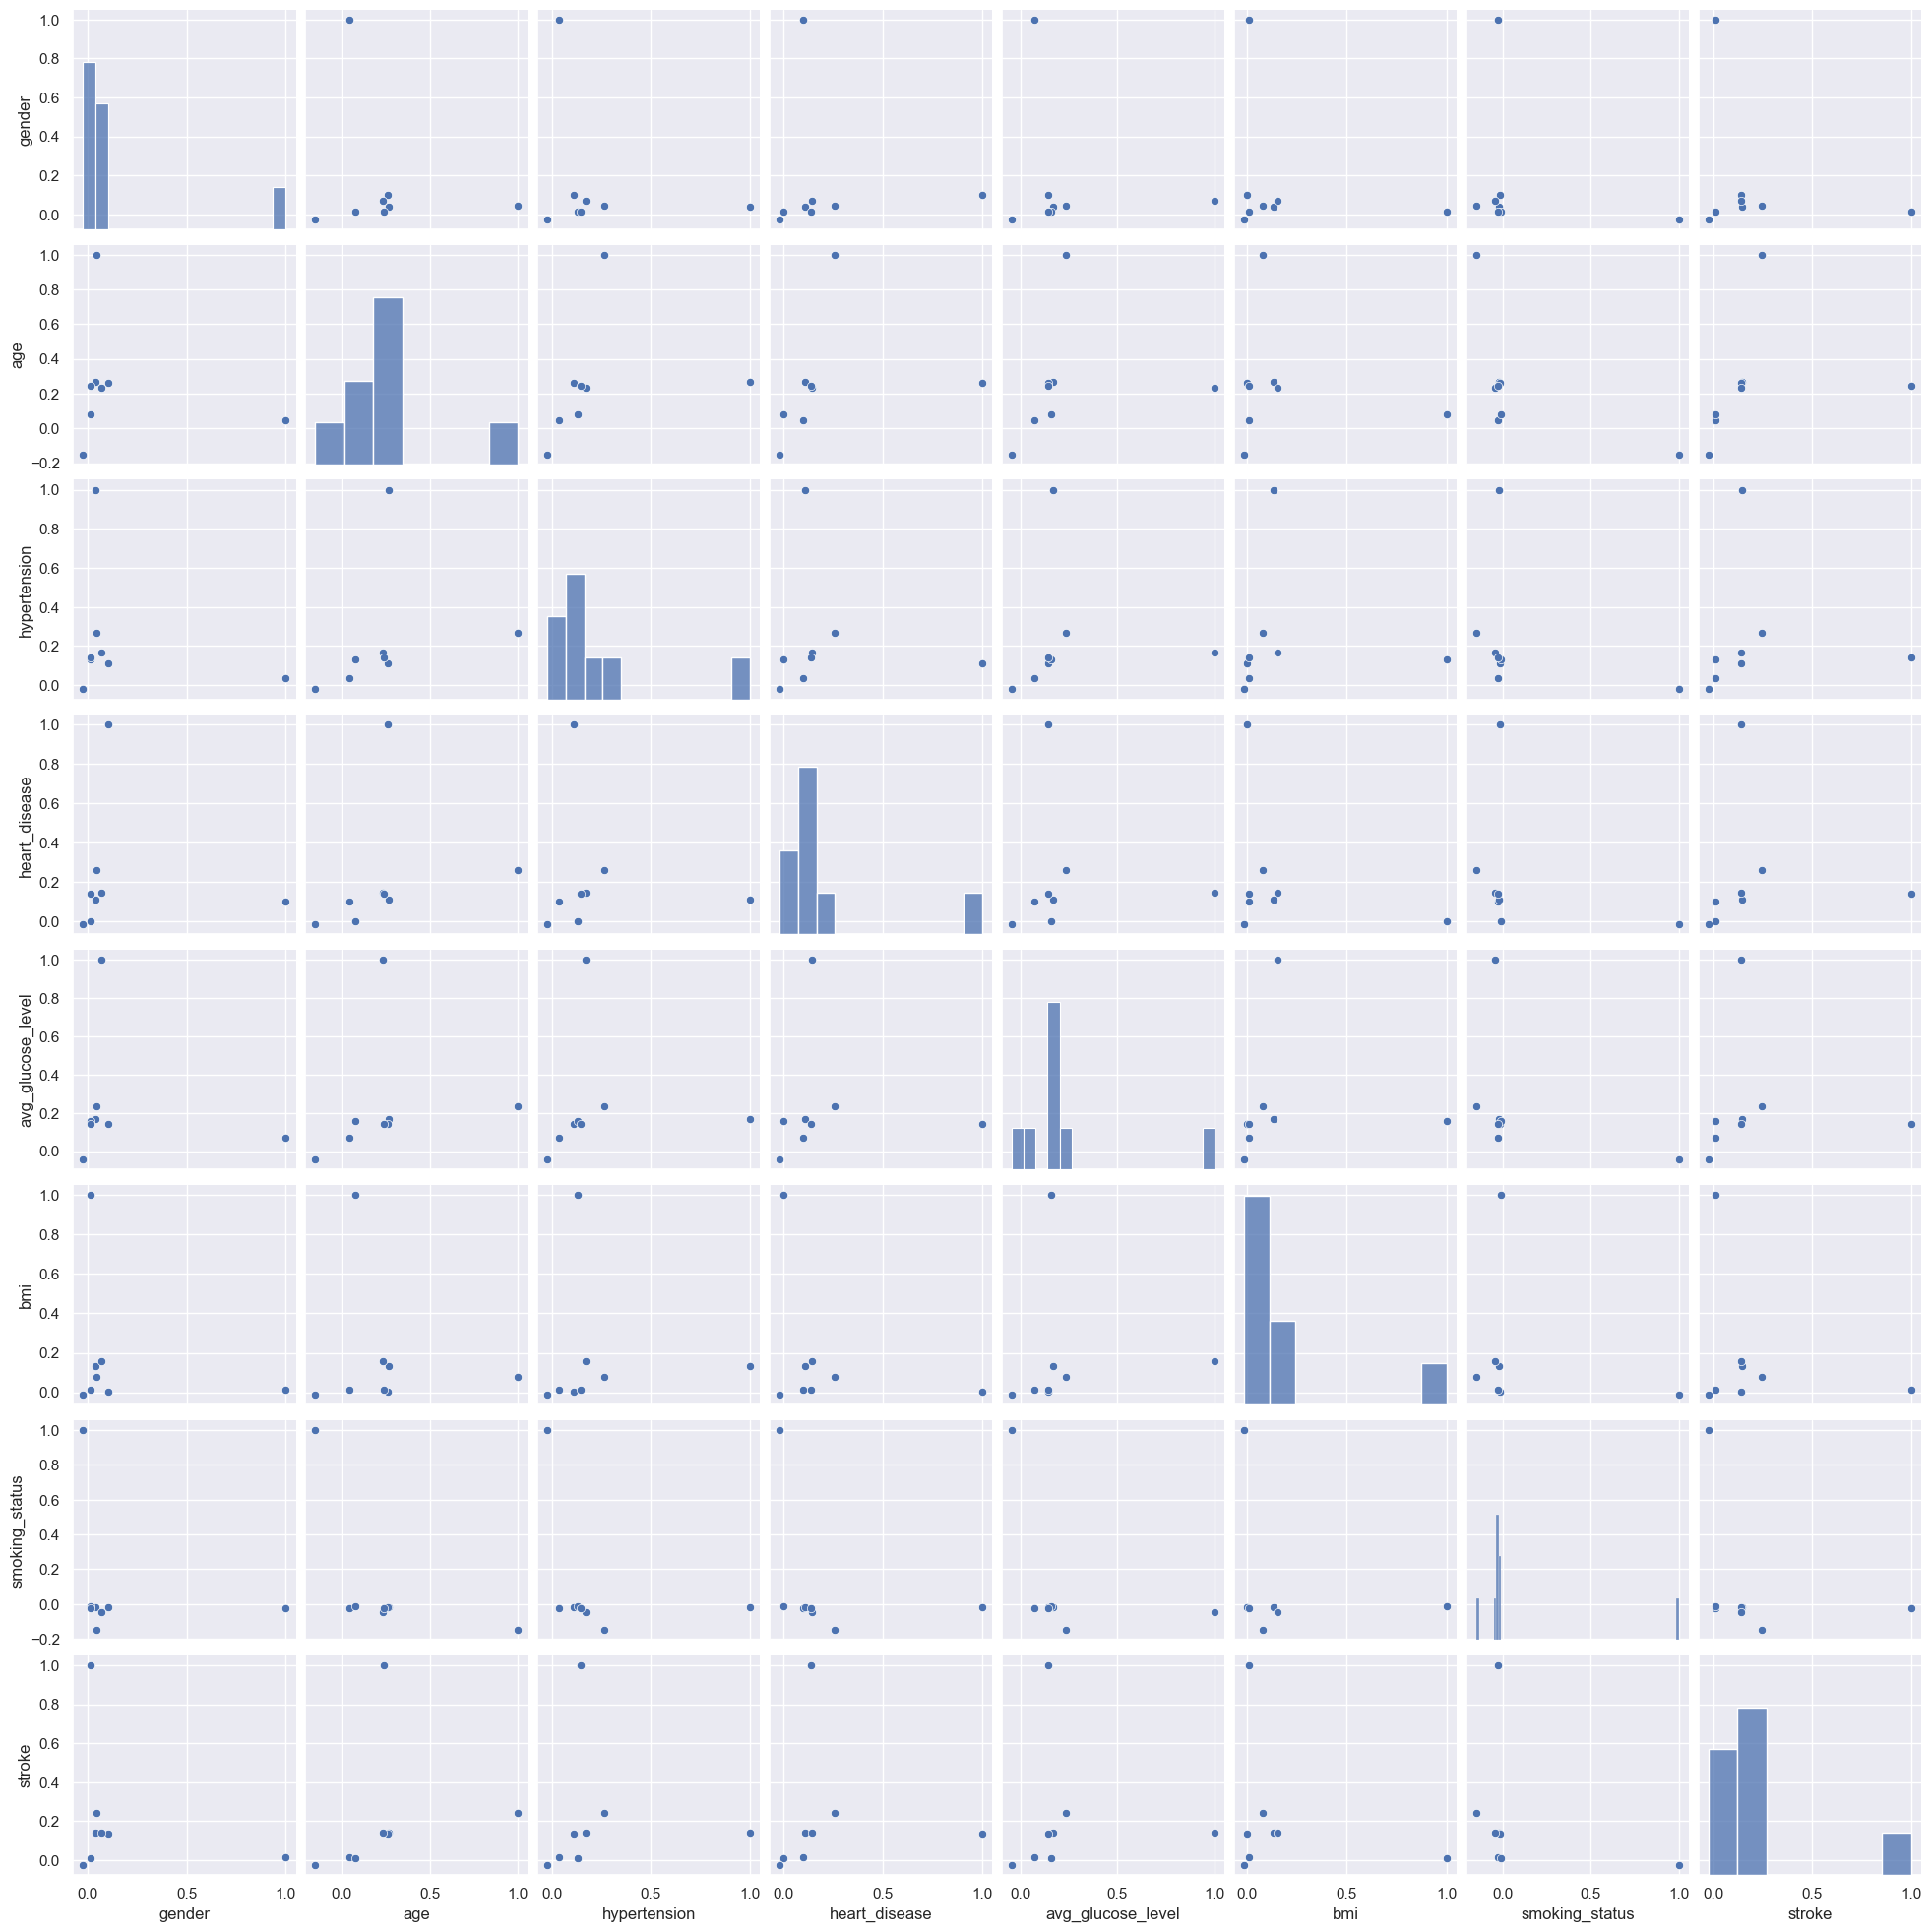

In [295]:
sns.pairplot(df[corr_cols].corr())
plt.show()

Рассмотрим дополнительно пару теорий. Влияет ли факт курения на шанс инсульта.
Как видно - разница с некурящими людьми на данной выборке минимальна.

In [296]:

had_stroke = df[df['stroke'] == 1]['smoking_status'].value_counts()
no_stroke = df[df['stroke'] == 0]['smoking_status'].value_counts()

formerly_smoked = df['smoking_status'].value_counts().values[0]
did_not_smoke = df['smoking_status'].value_counts().values[1]
smokes = df['smoking_status'].value_counts().values[2]

formerly_smoked_stroke = int(round (had_stroke.values[0] / formerly_smoked * 100, 0))
did_not_smoke_stroke = int(round (had_stroke.values[1] / did_not_smoke * 100, 0))
smokes_stroke = int(round (had_stroke.values[2] / smokes * 100, 0))

print(f'Did not smoke stroke occurrence: {did_not_smoke_stroke}%')
print(f'Formerly smoked stroke occurrence: {formerly_smoked_stroke}%')
print(f'Smokes stroke occurrence: {smokes_stroke}%')


Did not smoke stroke occurrence: 7%
Formerly smoked stroke occurrence: 5%
Smokes stroke occurrence: 5%


Как влияет пол пациента на шанс инсульта?
Также видно, что от пола мало чего зависит.

In [297]:
had_stroke = df[df['stroke'] == 1]['gender'].value_counts()
no_stroke = df[df['stroke'] == 0]['gender'].value_counts()

female = df['gender'].value_counts().values[0]
male =  df['gender'].value_counts().values[1]

stroke_female = int(round (had_stroke.values[0] / female * 100, 0))
stroke_male = int(round( had_stroke.values[1] / male *100, 0))

print(f'Male stroke occurrence: {stroke_male}%')
print(f'Female stroke occurrence: {stroke_female}%')

Male stroke occurrence: 6%
Female stroke occurrence: 5%
